In [1]:
import csv
import pandas as pd
import numpy as np
import random

In [2]:
import glob
import os

finalDf = pd.DataFrame()
path = "*.csv"
for fname in glob.glob(path):
    df=pd.read_csv(fname)
    df.insert(3,"Food Group",os.path.basename(fname).split('.')[0],True)
    df.insert(4,"Type","single",True)
    single = True
    for i in df.index:
        if(df['KODE'][i]=="OLAHAN/PRODUK/KOMPOSIT") :
            single = False
        if(single == False) :
            df.at[i, 'Type'] = "processed food"
            
    finalDf = pd.concat([finalDf,df], ignore_index=True)

finalDf.to_csv('finalData.csv')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [3]:
finalData = pd.read_csv("finalData.csv")
finalData.head(4)

,Unnamed: 0,KODE,NAMA BAHAN,SUMBER,Food Group,Type,AIR (g),ENERGI (Kal),PROTEIN (g),LEMAK (g),...,TEMBAGA(mg),SENG (mg),RETINOL (mcg),B-KAR (mcg),KAR -TOTAL (mcg),THIAMIN (mg),RIBOFLAVIN (mg),NIASIN (mg),VIT_C (mg),Unnamed: 24
0,0,TUNGGAL/SINGLE,NaN,NaN,biji bijian,single,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CR001,"Kacang arab, kering",DABM-1964,biji bijian,single,11.6,330.0,23.8,1.4,...,0.85,3.4,NaN,40,140.0,0.77,0.21,1.5,2.0,100.0
2,2,CR002,"Kacang babi, kering",KZGPI-1990,biji bijian,single,11.6,341.0,30.4,3.2,...,0.82,3.1,NaN,NaN,87.0,0.23,0.33,2.8,NaN,80.0
3,3,CR003,"Kacang belimbing\n(kecipir), kering",KZGPI-1990,biji bijian,single,10.4,400.0,34.4,16.9,...,2.82,2.0,NaN,NaN,NaN,0.3,0.44,3.0,NaN,100.0


In [8]:
newDatframe = finalData.head(4)
newDatframe

,Unnamed: 0,KODE,NAMA BAHAN,SUMBER,Food Group,Type,AIR (g),ENERGI (Kal),PROTEIN (g),LEMAK (g),...,TEMBAGA(mg),SENG (mg),RETINOL (mcg),B-KAR (mcg),KAR -TOTAL (mcg),THIAMIN (mg),RIBOFLAVIN (mg),NIASIN (mg),VIT_C (mg),Unnamed: 24
0,0,TUNGGAL/SINGLE,NaN,NaN,biji bijian,single,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CR001,"Kacang arab, kering",DABM-1964,biji bijian,single,11.6,330.0,23.8,1.4,...,0.85,3.4,NaN,40,140.0,0.77,0.21,1.5,2.0,100.0
2,2,CR002,"Kacang babi, kering",KZGPI-1990,biji bijian,single,11.6,341.0,30.4,3.2,...,0.82,3.1,NaN,NaN,87.0,0.23,0.33,2.8,NaN,80.0
3,3,CR003,"Kacang belimbing\n(kecipir), kering",KZGPI-1990,biji bijian,single,10.4,400.0,34.4,16.9,...,2.82,2.0,NaN,NaN,NaN,0.3,0.44,3.0,NaN,100.0


In [197]:

def eliminate_data(input_file, output_file, column_name, target_words):
    with open(input_file, 'r') as file_in, open(output_file, 'w', newline='') as file_out:
        reader = csv.DictReader(file_in)
        writer = csv.DictWriter(file_out, fieldnames=reader.fieldnames)
        writer.writeheader()

        for row in reader:
            if not any(word in row[column_name].lower() for word in list(map(str.lower,target_words))):
                writer.writerow(row)

input_file = 'finalData.csv'
output_file = 'finalData_eliminated.csv'
column_name = 'NAMA BAHAN'
target_words = ['tepung','mentah','darah','beras','tikus', 'beracun']
eliminate_data(input_file, output_file, column_name, target_words)


PermissionError: [Errno 13] Permission denied: 'finalData_eliminated.csv'

In [4]:
dfFinalEliminated = pd.read_csv("final_data_done.csv")
dfFinalEliminated.shape
# dfFinalEliminated.iloc[[732]]

(933, 28)

In [5]:
dfFinalEliminated = dfFinalEliminated.dropna(subset=['NAMA BAHAN', 'SUMBER', 'ENERGI (Kal)', 'PROTEIN (g)', 'LEMAK (g)', 'KH (g)'])
dfFinalEliminated = dfFinalEliminated.reset_index(drop=True)
dfFinalEliminated.shape

(910, 28)

In [6]:
# createPopulation
# represented two meals

def createPopulation(dfFinalEliminated, n_population):
    # pop = np.random.randint(n_meal, size=(n_genes,n_population))
    pop=[]
    for i in range(n_population) :
        sourceCarbs = dfFinalEliminated[dfFinalEliminated['Food Group']=='serealia'].sample(n=3).index
        
        proteinDaging =  dfFinalEliminated[dfFinalEliminated['Food Group']=='daging dan unggas']
        proteinSeafood = dfFinalEliminated[dfFinalEliminated['Food Group']=='prooduk laut']
        proteinDataframe = pd.concat([proteinDaging,proteinSeafood])
        sourceProtAnim = proteinDataframe.sample(n=3).index
        print (sourceProtAnim)
        
        sourceVeggies = dfFinalEliminated[dfFinalEliminated['Food Group']=='sayuran'].sample(n=3).index
        sourceSnacks = dfFinalEliminated[dfFinalEliminated['Food Group']=='camilan'].sample(n=1).index
        FruitData = (dfFinalEliminated.loc[(dfFinalEliminated['Food Group']=='buah') & (dfFinalEliminated['Type']=='single')])
        sourceFruit = FruitData.sample(n=1).index
        # pembentukan kromosom
        pop.append([sourceCarbs[0],sourceProtAnim[0],sourceVeggies[0],sourceCarbs[1],sourceProtAnim[1],sourceVeggies[1],sourceCarbs[2],sourceProtAnim[2],sourceVeggies[2],sourceSnacks[0],sourceFruit[0]])
    pop = pd.DataFrame(pop)
    pop.columns = ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
    return pop
    # return sourceProtAnim

pop=createPopulation(dfFinalEliminated, 5)

Index([461, 520, 332], dtype='int64')
Index([536, 385, 489], dtype='int64')
Index([501, 459, 348], dtype='int64')
Index([337, 539, 342], dtype='int64')
Index([444, 525, 498], dtype='int64')


In [7]:
def viewResult(df,dfFinalEliminated):
    column_name= df.columns
    for i in column_name:
        indexOfSource = df._get_value(0,i)
        print (i , " : ",dfFinalEliminated._get_value(indexOfSource, 'NAMA BAHAN') )
    # return dfFinalEliminated.iloc[[0]]['NAMA BAHAN'].Name
    
# viewResult(dfPop.iloc[[0]],dfFinalEliminated)

In [8]:
def randomSelectionParent(n_population):
    position = np.random.permutation(n_population)
    # print(position)
    
    return position[0], position[1]

randomSelectionParent(5)

(2, 1)

In [9]:
def rouletteWheelSelectionParent(pop):
    sizeOfPopulation=pop.shape[0]
    sumOfFitnessPop = sum([chromosome['fitness BaseOn Menu'] for i,chromosome in pop.iterrows()])
    chromosomeProbabilities = [chromosome['fitness BaseOn Menu']/sumOfFitnessPop for i,chromosome in pop.iterrows()]
    arrayIndexPop = [i for i,chromosome in pop.iterrows()]
    choiceParent = np.random.choice(arrayIndexPop,2, p=chromosomeProbabilities)
    return choiceParent[0], choiceParent[1]


In [10]:
def randomSelectionPosition():
  columns= ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
  n_pointSize = random.randint(1,3)
  return np.random.choice(columns, size=n_pointSize, replace=False)
randomSelectionPosition()

array(['dinner_protAnimSource', 'fruit'], dtype='<U24')

In [11]:
def twopointSelectionPosition():
    n_pointSize = random.randint(1,3)
    position = np.random.choice(range(0,11),2,replace=False)
    position = np.sort(position)
    
    return position[0], position[1]

# twopointSelectionPosition()

In [12]:
def crossover(pop,n_population):
    # multipoint crossover
    popc = pop.copy()
    for i in range(n_population):
        # inisiasi parent a dan b
        a,b = rouletteWheelSelectionParent(pop)
        c1,c2 = twopointSelectionPosition()
        for i in range(c1,c2) :
             popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
    return popc


In [13]:
def mutation(popc,n_population):
    popm = popc.copy()
    mutationIn = ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
    source=0
    for i in range(n_population):
        mutation = np.random.choice(mutationIn)
        mutation = str(mutation)
        if (mutation == 'breakfast_carbSource' or mutation == 'lunch_carbSource' or mutation == 'dinner_carbSource'):
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='serealia'].sample(n=1).index
        elif(mutation == 'breakfast_protAnimSource' or mutation == 'lunch_protAnimSource' or mutation == 'dinner_protAnimSource') :
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='daging dan unggas'].sample(n=1).index
        elif(mutation == 'breakfast_veggSource' or mutation == 'lunch_veggSource' or mutation == 'dinner_veggSource') :
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='sayuran'].sample(n=1).index
        elif(mutation=='snack'):
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='camilan'].sample(n=1).index
        else:
            FruitData = (dfFinalEliminated.loc[(dfFinalEliminated['Food Group']=='buah') & (dfFinalEliminated['Type']=='single')])
            source = FruitData.sample(n=1).index
        popm.iloc[i][mutation]=source[0]
    return popm

In [14]:

def countFitnessMenu(pop,calNeeds):
    arrayOfPop = pop.to_numpy()
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    fitnessArray=[]
    caloriesTotalArray=[]
    for chromosome in arrayOfPop:
        index=0
        carboTotal = 0
        protTotal = 0
        fatTotal = 0
        calTotal =0
        for i in (chromosome):
            carbs = dfFinalEliminated.iloc[i]['KH (g)']
            prot = dfFinalEliminated.iloc[i]['PROTEIN (g)']
            fat = dfFinalEliminated.iloc[i]['LEMAK (g)']
            cal = dfFinalEliminated.iloc[i]['ENERGI (Kal)']
            carboTotal+=float(carbs)
            protTotal+=float(prot)
            calTotal+=float(cal)
            fatTotal+=float(fat)
            index+=1
    
        fitness = 1/(abs(carboTotal-carboNeeds)+abs(calTotal-calNeeds)+abs(protNeeds-protTotal)+abs(fatNeeds-fatTotal))
        fitnessArray.append(fitness)
        caloriesTotalArray.append(calTotal)
    
    pop['fitness BaseOn Menu'] = fitnessArray
    pop['calories total Based on Menu'] = caloriesTotalArray
    return pop
    

    

In [15]:
def createPopulationAmount(sizeOfPopulation):
    # sizeOfPopulation = 5
    sizeOfChromosomes = 11
    pop = np.random.uniform(low = 0.5, high=1.5, size=(sizeOfPopulation,sizeOfChromosomes))
    pop = np.round_(pop, decimals=1)
    pop = pd.DataFrame(pop)
    pop.columns = ['nCarbs_br','nProt_br','nVeggies_br','nCarbs_lunch','nProt_lunch','nVeggies_lunch','nCarbs_dinner','nProt_dinner','nVeggies_dinner','n_snack','n_fruit']
    return pop
# p =createPopulationAmount()

In [16]:
def randomSelectionParentAmount(sizeOfPopulation):
    position = np.random.permutation(sizeOfPopulation)
    return position[0], position[1]



# randomSelectionParentAmount()
# print(a)

In [ ]:
# def rouletteWheelSelectionParent(pop):
    #     sizeOfPopulation=pop.shape[0]
#     position = np.random.permutation(sizeOfPopulation)
#     # print(position)
    
#     return position[0], position[1]

# pop = createPopulation(dfFinalEliminated, 5)
# pop
# # dfFinalEliminated.shape

In [17]:
import random
def randomSelectionPositionAmount():
  a=['nCarbs_br','nProt_br','nVeggies_br','nCarbs_lunch','nProt_lunch','nVeggies_lunch','nCarbs_dinner','nProt_dinner','nVeggies_dinner','n_snack','n_fruit']
  return np.random.choice(a, size=1, replace=False)[0]
# randomSelectionPosition()

In [18]:
def crossoverAmount(pop,sizeOfPopulation):
    popc = pop.copy()
    for i in range(sizeOfPopulation):
      # inisiasi parent a dan b
        a,b = randomSelectionParentAmount(sizeOfPopulation)
        swap = randomSelectionPositionAmount()
        # crossover
        popc.iloc[a][swap], popc.iloc[b][swap] = pop.iloc[b][swap], pop.iloc[a][swap]
    return popc



In [19]:
def arithmeticCrossoverAmount(pop,sizeOfPopulation):
    alpha=random.uniform(0.1,0.9)
    alpha=round(alpha, 1)
    betha=1-alpha
    betha=round(betha, 1)
    
    popc = pop.copy()
    for i in range (sizeOfPopulation):
        a,b = randomSelectionParentAmount(sizeOfPopulation)
        crossoverResult = []
        for j in range (11):
            value = round(alpha * pop.iloc[a][pop.columns[j]] + betha * pop.iloc[b][pop.columns[j]],1)
            crossoverResult.append(value)
            popc.loc[i , pop.columns[j]]=value
    return popc

# arithmeticCrossoverAmount(p,5)

In [20]:
def mutationAmount(pop, sizeOfPopulation):
    for i in range(sizeOfPopulation):
        a,b = twopointSelectionPosition()
        for j in range(a,b) :
            alpha=random.uniform(-0.5,0.4)
            alpha=round(alpha, 1)
            pop.iloc[i][pop.columns[j]]=abs(round(pop.iloc[i][pop.columns[j]] + alpha ,1))
    return pop

# pop=createPopulationAmount()
# mutationAmount(pop, 5)

In [21]:
def fitnessAmount(popAmount,chromosomesMenu,calNeeds):
    arrayOfAmount = popAmount.to_numpy()
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    fitnessArray=[]
    caloriesTotalArray=[]
    for amount in arrayOfAmount:
        index=0
        carboTotal = 0
        protTotal = 0
        fatTotal = 0
        calTotal =0
        for i in range(11):
            carbs = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['KH (g)'])*amount[index]
            prot = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['PROTEIN (g)'])*amount[index]
            fat = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['LEMAK (g)'])*amount[index]
            cal = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['ENERGI (Kal)'])*amount[index]
            carboTotal+=carbs
            protTotal+=prot
            calTotal+=cal
            fatTotal+=float(fat)
            index+=1
        fitness = 1/(abs(carboTotal-carboNeeds)+abs(calTotal-calNeeds)+abs(protNeeds-protTotal)+abs(fatNeeds-fatTotal))
        fitnessArray.append(fitness)
        caloriesTotalArray.append(calTotal)
        
    popAmount['fitness'] = fitnessArray
    popAmount['calories total'] = caloriesTotalArray
    return popAmount
        
# pop=createPopulationAmount() 
# chromosomesMenu = popm.iloc[[0]]
# fitnessAmount(pop,chromosomes)

In [22]:

def decideAmountThroughGeneticAlgorithm(chromosomes,calNeeds,n_iteration_inner,popSize_inner):
    # Carbohydrates provide 4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram.
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]}
    goal_amount=pd.DataFrame(goal_amount)
    current_amount=pd.DataFrame()
    chromosomes = chromosomes.to_numpy(dtype = int)[0]
    chromosomes = chromosomes[0:11]
    # iteration=50
    # for i in range(iteration):
    # isGlobalOptimum=falses
    n=0
    for i in range(n_iteration_inner):
        pop=createPopulationAmount(popSize_inner)
        pop=fitnessAmount(pop,chromosomes,calNeeds)
        # popc=crossoverAmount(pop,5)
        popc=arithmeticCrossoverAmount(pop,5)
        popc=fitnessAmount(popc,chromosomes,calNeeds)
        # popm=mutationAmount(popc,5)
        current_amount = popc.sort_values(by = 'fitness',ascending = True).iloc[[0]]
        if goal_amount.iloc[0]["fitness"]<current_amount.iloc[0]["fitness"]:
            goal_amount.iloc[[0]]=current_amount.iloc[[0]]
        # if (n==10):
        #       isGlobalOptimum=True
        # if ():
        #       n+=1
        # print(current_amount.iloc[0]["fitness"], " ==== ", i_chromosomes)
    return goal_amount

# decideAmountThroughGeneticAlgorithm(pop.iloc[[0]],1900)

In [23]:
def viewResultByOptimalAmount(popFinalAmount,chromosomes,calNeeds):
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # chromosomes = chromosomes.pop["fitness"]
    amountArray=popFinalAmount.to_numpy()[0]
    chromosomes = chromosomes.to_numpy()[0]
    chromosomes = chromosomes[0:11]
    index=0
    finalCarbs = 0
    finalProt = 0
    finalFat = 0
    finalCal = 0
    for i in (chromosomes):
        carbs = float(dfFinalEliminated.iloc[int(i)]['KH (g)'])*amountArray[index]
        prot = float(dfFinalEliminated.iloc[int(i)]['PROTEIN (g)'])*amountArray[index]
        fat = float(dfFinalEliminated.iloc[int(i)]['LEMAK (g)'])*amountArray[index]
        cal = float(dfFinalEliminated.iloc[int(i)]['ENERGI (Kal)'])*amountArray[index]
        finalCarbs += carbs
        finalProt += prot
        finalFat += fat
        finalCal += cal
        index+=1
    print ("kebutuhan kalori - real kalori : " ,calNeeds , " - ", finalCal)
    print ("kebutuhan karbo - real karbo : " ,carboNeeds , " - ", finalCarbs)
    print ("kebutuhan prot - real prot : " ,protNeeds , " - ", finalProt)
    print ("kebutuhan lemak - real lemak : " ,fatNeeds , " - ", finalFat)
    print("\n")
    print ("===BREAKFAST===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[0])]['NAMA BAHAN'], " ",100*amountArray[0], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[1])]['NAMA BAHAN'], " ",100*amountArray[1], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[2])]['NAMA BAHAN'], " ",100*amountArray[2], "gr")
    print ("===LUNCH===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[3])]['NAMA BAHAN'], " ",100*amountArray[3], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[4])]['NAMA BAHAN'], " ",100*amountArray[4], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[5])]['NAMA BAHAN'], " ",100*amountArray[5], "gr")
    print ("===DINNER===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[6])]['NAMA BAHAN'], " ",100*amountArray[6], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[7])]['NAMA BAHAN'], " ",100*amountArray[7], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[8])]['NAMA BAHAN'], " ",100*amountArray[8], "gr")
    print("===CAMILAN===")
    print("camilan pagi (buah) : " , dfFinalEliminated.iloc[int(chromosomes[9])]['NAMA BAHAN'], " ",100*amountArray[9], "gr")
    print("camilan sore : " , dfFinalEliminated.iloc[int(chromosomes[10])]['NAMA BAHAN'], " ",100*amountArray[10], "gr")

# viewResultByOptimalAmount(amountFinal,popm.iloc[[0]])

In [24]:

def main(calNeeds):
    n_iteration=10
    defCal=False
    calNeeds = 1700
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[],'sourceFruit':[],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[],'nFruit':[],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    
    menuPop = createPopulation(dfFinalEliminated,5)
    for i in range (n_iteration):
        fitnessArray=[]
        menuPop = countFitnessMenu(menuPop)
        menuPop=crossover(menuPop,5)
        menuPop=mutation(menuPop,5)
        for i in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[i]],calNeeds)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for i in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[i]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[i]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
              # print(goal_menu.iloc[[0]])
    # print(goal_amount)
    # print(goal_menu)
    # print(menuPopM)
    # print("====================")
    # print(popAmount)
    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)


main()
    


TypeError: main() missing 1 required positional argument: 'calNeeds'

In [32]:

def generateMealPlan(calNeeds,n):
    n_iteration=5
    arrayOfIteration = []
    arrayOfFitness = []
    defCal=False
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[-1],'sourceFruit':[-1],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    for i in range (n_iteration):
        fitnessArray=[]
        menuPop = createPopulation(dfFinalEliminated,5)
        menuPop = countFitnessMenu(menuPop,calNeeds)
        menuPopC=crossover(menuPop,5)
        menuPopM=mutation(menuPop,5)
        for j in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[j]],calNeeds)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for k in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[k]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[k]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
        
        arrayOfFitness.append(goal_menu.iloc[0]['fitness optimal'])
        arrayOfIteration.append(i)
    
    print(goal_amount.iloc[0]['fitness'])
    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)
    return arrayOfFitness,arrayOfIteration


# main2()
    


In [33]:
def inputData() :
    age=int(input("masukkan umur"))
    weight=int(input("masukkan berat badan"))
    height=int(input("masukkan tinggi badan"))
    isFemale=bool(input("perempuan?"))
    activityLevel=str(input("level aktivitas?"))

    if isFemale:
        constanta = -161
    else:
        constanta = 5
    caloriesDaily = (10* weight) + (6.25*height) - (5*age) + constanta
    if (activityLevel=="sedentary"):
        caloriesDaily = caloriesDaily*1.2
    elif(activityLevel=="lightly"):
        caloriesDaily = caloriesDaily*1.375
    elif(activityLevel=="moderately"):
        caloriesDaily = caloriesDaily*1.55
    elif(activityLevel=="very active"):
        caloriesDaily = caloriesDaily*1.725
    elif(activityLevel=="extra active"):
        caloriesDaily = caloriesDaily*1.9
    else :
        print("doenst match")
    
    return caloriesDaily
calNeed = inputData()
xIteration,yFitness= main2(calNeed)
# import matplotlib.pyplot as plt
# plt.plot(yFitness,xIteration)

# plt.show()

Index([473, 485, 517], dtype='int64')
Index([367, 503, 473], dtype='int64')
Index([484, 476, 297], dtype='int64')
Index([491, 400, 402], dtype='int64')
Index([454, 349, 342], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([383, 521, 333], dtype='int64')
Index([539, 380, 475], dtype='int64')
Index([521, 294, 400], dtype='int64')
Index([484, 461, 359], dtype='int64')
Index([539, 465, 518], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([300, 317, 507], dtype='int64')
Index([327, 446, 329], dtype='int64')
Index([364, 391, 371], dtype='int64')
Index([444, 312, 361], dtype='int64')
Index([534, 463, 379], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([467, 460, 463], dtype='int64')
Index([345, 439, 352], dtype='int64')
Index([515, 525, 325], dtype='int64')
Index([386, 484, 441], dtype='int64')
Index([447, 310, 507], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([364, 398, 392], dtype='int64')
Index([452, 298, 480], dtype='int64')
Index([290, 335, 397], dtype='int64')
Index([391, 463, 332], dtype='int64')
Index([369, 296, 484], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


0.01678063514704032
kebutuhan kalori - real kalori :  1477.8  -  1498.0
kebutuhan karbo - real karbo :  221.67  -  239.31999999999994
kebutuhan prot - real prot :  55.4175  -  73.46
kebutuhan lemak - real lemak :  24.63  -  28.33


===BREAKFAST===
sumber karbohidrat :  Amparan tatak   90.0 gr
sumber protein :  Ikan kawalinya, segar   150.0 gr
sumber sayuran/protein nabati :  Labu siam, segar   100.0 gr
===LUNCH===
sumber karbohidrat :  Mie aceh rebus   120.0 gr
sumber protein :  Ikan mayong, segar   130.0 gr
sumber sayuran/protein nabati :  Paria putih, segar   100.0 gr
===DINNER===
sumber karbohidrat :  Masekat   100.0 gr
sumber protein :  Rajungan, segar   120.0 gr
sumber sayuran/protein nabati :  Pepaya muda, segar   120.0 gr
===CAMILAN===
camilan pagi (buah) :  Bantal   120.0 gr
camilan sore :  Embacang, segar   130.0 gr


In [27]:

def generateMealPlan(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner):
    # n_iteration_outer=5
    arrayOfIteration = []
    arrayOfFitness = []
    defCal=False
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[-1],'sourceFruit':[-1],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    for i in range (n_iteration_outer):
        fitnessArray=[]
        menuPop = createPopulation(dfFinalEliminated,popSize_outer)
        menuPop = countFitnessMenu(menuPop,calNeeds)
        menuPopC=crossover(menuPop,5)
        menuPopM=mutation(menuPop,5)
        for j in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[j]],calNeeds,n_iteration_inner,popSize_inner)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for k in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[k]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[k]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
        
        arrayOfFitness.append(goal_menu.iloc[0]['fitness optimal'])
        arrayOfIteration.append(i)
    
    print(goal_menu.iloc[[0]])
    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)
    # return arrayOfFitness,arrayOfIteration
    return goal_menu.iloc[0]['fitness optimal']


generateMealPlan(2000,10,20,5,7)
    


Index([374, 299, 307], dtype='int64')
Index([291, 458, 537], dtype='int64')
Index([346, 304, 305], dtype='int64')
Index([355, 497, 531], dtype='int64')
Index([467, 474, 496], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([487, 476, 465], dtype='int64')
Index([483, 490, 500], dtype='int64')
Index([528, 299, 478], dtype='int64')
Index([401, 535, 358], dtype='int64')
Index([464, 524, 505], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([303, 295, 399], dtype='int64')
Index([396, 328, 387], dtype='int64')
Index([396, 439, 327], dtype='int64')
Index([530, 396, 365], dtype='int64')
Index([327, 321, 305], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([365, 535, 533], dtype='int64')
Index([362, 322, 359], dtype='int64')
Index([469, 488, 291], dtype='int64')
Index([341, 439, 343], dtype='int64')
Index([394, 532, 531], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([379, 494, 361], dtype='int64')
Index([342, 383, 500], dtype='int64')
Index([308, 377, 333], dtype='int64')
Index([340, 456, 463], dtype='int64')
Index([398, 371, 315], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([353, 323, 534], dtype='int64')
Index([398, 514, 530], dtype='int64')
Index([451, 520, 532], dtype='int64')
Index([370, 526, 355], dtype='int64')
Index([322, 384, 342], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([295, 357, 538], dtype='int64')
Index([488, 394, 396], dtype='int64')
Index([454, 515, 462], dtype='int64')
Index([377, 448, 309], dtype='int64')
Index([354, 526, 355], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([347, 480, 494], dtype='int64')
Index([308, 317, 496], dtype='int64')
Index([386, 479, 398], dtype='int64')
Index([451, 512, 502], dtype='int64')
Index([508, 500, 539], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([439, 503, 399], dtype='int64')
Index([290, 442, 527], dtype='int64')
Index([384, 501, 306], dtype='int64')
Index([339, 388, 377], dtype='int64')
Index([398, 360, 340], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([390, 472, 456], dtype='int64')
Index([378, 381, 368], dtype='int64')
Index([492, 322, 524], dtype='int64')
Index([297, 485, 524], dtype='int64')
Index([515, 481, 357], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_31788\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


   breakfast_carbSource  breakfast_protAnimSource  breakfast_veggSource   
2                   758                       451                   623  \

   lunch_carbSource  lunch_protAnimSource  lunch_veggSource   
2               680                   520               588  \

   dinner_carbSource  dinner_protAnimSource  dinner_veggSource  snack  fruit   
2                761                    532                545    870    163  \

   fitness BaseOn Menu  calories total Based on Menu  fitness optimal  
2             0.009646                        2057.0         0.009006  
kebutuhan kalori - real kalori :  2000  -  1944.0000000000002
kebutuhan karbo - real karbo :  300.0  -  271.25000000000006
kebutuhan prot - real prot :  75.0  -  59.63
kebutuhan lemak - real lemak :  33.333333333333336  -  44.24999999999999


===BREAKFAST===
sumber karbohidrat :  Nasi gurih   60.0 gr
sumber protein :  Ikan Belida, segar   80.0 gr
sumber sayuran/protein nabati :  Eceng, segar   130.0 gr
===LUNCH===

0.009006034042808706

Index([350, 355, 523], dtype='int64')
Index([496, 479, 363], dtype='int64')
Index([523, 382, 310], dtype='int64')
Index([306, 491, 472], dtype='int64')
Index([369, 515, 513], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([511, 309, 400], dtype='int64')
Index([310, 367, 299], dtype='int64')
Index([391, 348, 314], dtype='int64')
Index([475, 458, 467], dtype='int64')
Index([308, 492, 349], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([514, 480, 521], dtype='int64')
Index([353, 464, 308], dtype='int64')
Index([296, 311, 476], dtype='int64')
Index([456, 339, 515], dtype='int64')
Index([378, 344, 481], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([526, 456, 475], dtype='int64')
Index([526, 385, 313], dtype='int64')
Index([363, 469, 520], dtype='int64')
Index([363, 439, 527], dtype='int64')
Index([480, 392, 459], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([502, 446, 296], dtype='int64')
Index([521, 502, 486], dtype='int64')
Index([540, 351, 514], dtype='int64')
Index([322, 367, 362], dtype='int64')
Index([462, 533, 320], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([452, 375, 369], dtype='int64')
Index([347, 490, 506], dtype='int64')
Index([487, 290, 458], dtype='int64')
Index([503, 335, 505], dtype='int64')
Index([306, 439, 303], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([301, 519, 508], dtype='int64')
Index([494, 478, 367], dtype='int64')
Index([479, 336, 401], dtype='int64')
Index([337, 340, 461], dtype='int64')
Index([349, 380, 401], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([309, 344, 368], dtype='int64')
Index([524, 364, 303], dtype='int64')
Index([500, 480, 482], dtype='int64')
Index([472, 292, 453], dtype='int64')
Index([477, 497, 321], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([443, 453, 526], dtype='int64')
Index([355, 442, 471], dtype='int64')
Index([397, 365, 331], dtype='int64')
Index([460, 441, 308], dtype='int64')
Index([337, 371, 395], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([314, 526, 447], dtype='int64')
Index([451, 383, 326], dtype='int64')
Index([509, 374, 292], dtype='int64')
Index([480, 530, 383], dtype='int64')
Index([320, 316, 347], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([390, 476, 355], dtype='int64')
Index([326, 342, 362], dtype='int64')
Index([488, 357, 380], dtype='int64')
Index([498, 499, 489], dtype='int64')
Index([489, 470, 455], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([379, 481, 309], dtype='int64')
Index([311, 535, 530], dtype='int64')
Index([539, 377, 321], dtype='int64')
Index([290, 520, 479], dtype='int64')
Index([390, 381, 540], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([448, 384, 319], dtype='int64')
Index([528, 311, 477], dtype='int64')
Index([523, 503, 400], dtype='int64')
Index([324, 293, 475], dtype='int64')
Index([527, 295, 331], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([324, 307, 396], dtype='int64')
Index([527, 532, 450], dtype='int64')
Index([315, 330, 345], dtype='int64')
Index([370, 334, 299], dtype='int64')
Index([308, 497, 347], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([305, 375, 320], dtype='int64')
Index([346, 538, 449], dtype='int64')
Index([448, 503, 346], dtype='int64')
Index([510, 333, 495], dtype='int64')
Index([528, 320, 500], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([296, 504, 317], dtype='int64')
Index([365, 473, 538], dtype='int64')
Index([479, 316, 358], dtype='int64')
Index([326, 327, 487], dtype='int64')
Index([514, 517, 290], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([304, 485, 345], dtype='int64')
Index([451, 394, 323], dtype='int64')
Index([309, 444, 359], dtype='int64')
Index([492, 441, 321], dtype='int64')
Index([401, 360, 396], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([317, 399, 457], dtype='int64')
Index([333, 456, 525], dtype='int64')
Index([530, 508, 525], dtype='int64')
Index([541, 303, 350], dtype='int64')
Index([357, 373, 328], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([354, 302, 331], dtype='int64')
Index([520, 361, 442], dtype='int64')
Index([338, 469, 353], dtype='int64')
Index([376, 441, 439], dtype='int64')
Index([378, 327, 349], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([303, 379, 447], dtype='int64')
Index([524, 533, 354], dtype='int64')
Index([456, 446, 337], dtype='int64')
Index([495, 527, 448], dtype='int64')
Index([508, 390, 374], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([471, 374, 489], dtype='int64')
Index([368, 524, 449], dtype='int64')
Index([515, 364, 329], dtype='int64')
Index([307, 456, 449], dtype='int64')
Index([357, 390, 342], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([537, 347, 336], dtype='int64')
Index([343, 391, 396], dtype='int64')
Index([358, 332, 318], dtype='int64')
Index([475, 527, 476], dtype='int64')
Index([478, 465, 299], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([355, 339, 385], dtype='int64')
Index([373, 439, 469], dtype='int64')
Index([397, 482, 386], dtype='int64')
Index([458, 294, 399], dtype='int64')
Index([456, 331, 329], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([313, 303, 333], dtype='int64')
Index([537, 477, 397], dtype='int64')
Index([318, 536, 489], dtype='int64')
Index([476, 511, 337], dtype='int64')
Index([506, 368, 388], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([532, 539, 524], dtype='int64')
Index([402, 519, 483], dtype='int64')
Index([523, 297, 366], dtype='int64')
Index([376, 307, 444], dtype='int64')
Index([524, 308, 531], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([537, 375, 373], dtype='int64')
Index([320, 487, 533], dtype='int64')
Index([506, 329, 512], dtype='int64')
Index([324, 348, 392], dtype='int64')
Index([302, 450, 346], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([461, 379, 485], dtype='int64')
Index([509, 383, 476], dtype='int64')
Index([292, 291, 503], dtype='int64')
Index([476, 473, 535], dtype='int64')
Index([355, 530, 466], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([303, 359, 346], dtype='int64')
Index([387, 351, 299], dtype='int64')
Index([398, 309, 487], dtype='int64')
Index([477, 292, 374], dtype='int64')
Index([512, 346, 485], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([474, 510, 298], dtype='int64')
Index([467, 353, 355], dtype='int64')
Index([376, 331, 348], dtype='int64')
Index([399, 497, 444], dtype='int64')
Index([323, 401, 358], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([486, 385, 339], dtype='int64')
Index([349, 485, 518], dtype='int64')
Index([371, 314, 497], dtype='int64')
Index([530, 396, 460], dtype='int64')
Index([320, 322, 352], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([400, 532, 303], dtype='int64')
Index([390, 460, 297], dtype='int64')
Index([540, 378, 490], dtype='int64')
Index([363, 492, 305], dtype='int64')
Index([347, 492, 340], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([398, 541, 457], dtype='int64')
Index([491, 360, 496], dtype='int64')
Index([490, 502, 336], dtype='int64')
Index([525, 484, 481], dtype='int64')
Index([320, 358, 530], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([317, 456, 332], dtype='int64')
Index([307, 291, 400], dtype='int64')
Index([308, 491, 379], dtype='int64')
Index([329, 531, 341], dtype='int64')
Index([461, 523, 380], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([455, 464, 540], dtype='int64')
Index([515, 483, 325], dtype='int64')
Index([372, 308, 513], dtype='int64')
Index([488, 371, 512], dtype='int64')
Index([475, 447, 313], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([489, 302, 315], dtype='int64')
Index([479, 329, 331], dtype='int64')
Index([439, 516, 397], dtype='int64')
Index([501, 455, 387], dtype='int64')
Index([321, 301, 380], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([534, 384, 372], dtype='int64')
Index([338, 391, 498], dtype='int64')
Index([472, 324, 320], dtype='int64')
Index([486, 373, 353], dtype='int64')
Index([450, 296, 463], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([345, 523, 372], dtype='int64')
Index([375, 523, 490], dtype='int64')
Index([397, 507, 534], dtype='int64')
Index([339, 340, 540], dtype='int64')
Index([517, 371, 521], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([350, 361, 459], dtype='int64')
Index([453, 399, 383], dtype='int64')
Index([335, 530, 299], dtype='int64')
Index([453, 325, 470], dtype='int64')
Index([527, 315, 389], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([378, 300, 384], dtype='int64')
Index([374, 394, 519], dtype='int64')
Index([482, 520, 292], dtype='int64')
Index([333, 486, 445], dtype='int64')
Index([382, 299, 347], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([385, 398, 310], dtype='int64')
Index([344, 455, 532], dtype='int64')
Index([480, 352, 531], dtype='int64')
Index([479, 358, 381], dtype='int64')
Index([365, 352, 313], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([453, 459, 375], dtype='int64')
Index([533, 385, 458], dtype='int64')
Index([340, 317, 351], dtype='int64')
Index([328, 494, 370], dtype='int64')
Index([369, 537, 496], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([462, 301, 350], dtype='int64')
Index([461, 476, 493], dtype='int64')
Index([331, 541, 498], dtype='int64')
Index([300, 324, 539], dtype='int64')
Index([451, 353, 501], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([445, 517, 443], dtype='int64')
Index([458, 443, 499], dtype='int64')
Index([456, 393, 503], dtype='int64')
Index([529, 323, 515], dtype='int64')
Index([362, 384, 378], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([317, 457, 401], dtype='int64')
Index([480, 399, 503], dtype='int64')
Index([392, 391, 446], dtype='int64')
Index([374, 359, 383], dtype='int64')
Index([496, 344, 540], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([496, 517, 381], dtype='int64')
Index([475, 454, 498], dtype='int64')
Index([364, 342, 302], dtype='int64')
Index([534, 454, 486], dtype='int64')
Index([396, 489, 318], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([487, 518, 533], dtype='int64')
Index([521, 460, 306], dtype='int64')
Index([460, 487, 490], dtype='int64')
Index([402, 462, 333], dtype='int64')
Index([391, 453, 326], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([357, 371, 457], dtype='int64')
Index([444, 442, 292], dtype='int64')
Index([465, 371, 318], dtype='int64')
Index([360, 344, 314], dtype='int64')
Index([458, 348, 396], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([397, 371, 300], dtype='int64')
Index([519, 492, 514], dtype='int64')
Index([476, 506, 504], dtype='int64')
Index([359, 305, 538], dtype='int64')
Index([374, 314, 517], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([442, 317, 520], dtype='int64')
Index([457, 387, 444], dtype='int64')
Index([351, 483, 389], dtype='int64')
Index([538, 338, 351], dtype='int64')
Index([471, 375, 358], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([450, 518, 319], dtype='int64')
Index([380, 514, 367], dtype='int64')
Index([325, 444, 368], dtype='int64')
Index([476, 445, 477], dtype='int64')
Index([362, 520, 300], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([460, 510, 481], dtype='int64')
Index([319, 508, 357], dtype='int64')
Index([323, 361, 374], dtype='int64')
Index([379, 503, 539], dtype='int64')
Index([357, 528, 311], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([444, 530, 501], dtype='int64')
Index([452, 312, 333], dtype='int64')
Index([338, 513, 293], dtype='int64')
Index([498, 351, 488], dtype='int64')
Index([472, 340, 315], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([504, 522, 448], dtype='int64')
Index([296, 322, 529], dtype='int64')
Index([531, 501, 334], dtype='int64')
Index([470, 321, 515], dtype='int64')
Index([369, 525, 473], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([508, 442, 526], dtype='int64')
Index([400, 480, 325], dtype='int64')
Index([457, 475, 365], dtype='int64')
Index([291, 293, 465], dtype='int64')
Index([501, 363, 295], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([440, 529, 467], dtype='int64')
Index([311, 347, 480], dtype='int64')
Index([320, 468, 385], dtype='int64')
Index([374, 315, 305], dtype='int64')
Index([362, 470, 304], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([351, 395, 511], dtype='int64')
Index([530, 497, 502], dtype='int64')
Index([510, 539, 462], dtype='int64')
Index([503, 456, 316], dtype='int64')
Index([347, 296, 473], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([454, 391, 298], dtype='int64')
Index([347, 454, 499], dtype='int64')
Index([369, 506, 445], dtype='int64')
Index([294, 358, 325], dtype='int64')
Index([518, 444, 302], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([349, 387, 484], dtype='int64')
Index([313, 460, 520], dtype='int64')
Index([391, 467, 490], dtype='int64')
Index([317, 517, 531], dtype='int64')
Index([466, 371, 534], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([357, 461, 478], dtype='int64')
Index([324, 524, 368], dtype='int64')
Index([363, 385, 531], dtype='int64')
Index([518, 304, 353], dtype='int64')
Index([454, 505, 514], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([369, 382, 347], dtype='int64')
Index([522, 390, 332], dtype='int64')
Index([293, 323, 450], dtype='int64')
Index([380, 525, 462], dtype='int64')
Index([540, 499, 467], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([340, 450, 311], dtype='int64')
Index([480, 376, 491], dtype='int64')
Index([304, 343, 520], dtype='int64')
Index([485, 385, 477], dtype='int64')
Index([521, 334, 361], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([361, 390, 526], dtype='int64')
Index([522, 332, 471], dtype='int64')
Index([320, 382, 462], dtype='int64')
Index([316, 476, 520], dtype='int64')
Index([502, 368, 468], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([357, 374, 514], dtype='int64')
Index([533, 323, 497], dtype='int64')
Index([325, 380, 341], dtype='int64')
Index([526, 458, 297], dtype='int64')
Index([387, 388, 456], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([362, 396, 314], dtype='int64')
Index([539, 297, 494], dtype='int64')
Index([475, 527, 291], dtype='int64')
Index([335, 465, 384], dtype='int64')
Index([376, 510, 355], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([297, 522, 538], dtype='int64')
Index([444, 474, 365], dtype='int64')
Index([484, 401, 338], dtype='int64')
Index([318, 380, 311], dtype='int64')
Index([478, 382, 473], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([383, 292, 480], dtype='int64')
Index([480, 533, 320], dtype='int64')
Index([376, 526, 448], dtype='int64')
Index([335, 487, 331], dtype='int64')
Index([511, 356, 463], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([522, 329, 457], dtype='int64')
Index([509, 312, 337], dtype='int64')
Index([335, 502, 375], dtype='int64')
Index([352, 351, 460], dtype='int64')
Index([367, 453, 333], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([306, 519, 323], dtype='int64')
Index([341, 305, 332], dtype='int64')
Index([318, 463, 336], dtype='int64')
Index([290, 518, 330], dtype='int64')
Index([353, 511, 380], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([485, 537, 479], dtype='int64')
Index([511, 321, 302], dtype='int64')
Index([339, 470, 482], dtype='int64')
Index([358, 445, 441], dtype='int64')
Index([300, 302, 329], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([373, 331, 300], dtype='int64')
Index([359, 365, 358], dtype='int64')
Index([510, 526, 318], dtype='int64')
Index([338, 354, 343], dtype='int64')
Index([351, 372, 332], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([303, 491, 499], dtype='int64')
Index([322, 315, 360], dtype='int64')
Index([541, 530, 482], dtype='int64')
Index([315, 461, 527], dtype='int64')
Index([319, 525, 494], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([469, 454, 329], dtype='int64')
Index([362, 512, 345], dtype='int64')
Index([540, 326, 465], dtype='int64')
Index([308, 357, 482], dtype='int64')
Index([341, 342, 507], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([313, 353, 446], dtype='int64')
Index([466, 342, 441], dtype='int64')
Index([377, 500, 530], dtype='int64')
Index([516, 345, 483], dtype='int64')
Index([291, 485, 307], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([308, 464, 484], dtype='int64')
Index([476, 529, 514], dtype='int64')
Index([477, 479, 401], dtype='int64')
Index([320, 386, 484], dtype='int64')
Index([487, 313, 393], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([506, 471, 293], dtype='int64')
Index([480, 504, 513], dtype='int64')
Index([314, 390, 333], dtype='int64')
Index([356, 492, 462], dtype='int64')
Index([291, 341, 481], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


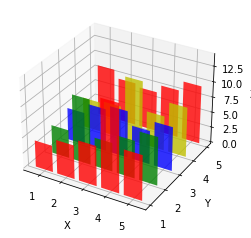

===TESTING RESULT===
optimal fitness :  14.211274277593606
optimal n population outer :  1
optimal n population inner :  4


In [71]:
import matplotlib.pyplot as plt
import numpy as np
def populationTestingVisualization():
    calNeeds=1700
    popSize_outer=5
    popSize_inner=5
    optimalFitness=-1
    optimal_n_outer = 0
    optimal_n_inner = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    colors = ['r', 'g', 'b','y','r']
    n_population_outer = [1,2,3,4,5]
    n_population_inner=[1,2,3,4,5]
    # ys=[34,56,34,89,34,67,12,9,23,5]

    for c, n_outer in zip(colors,n_population_outer):
        ys = []
        for i in (n_population_inner):
            fitness = generateMealPlan(calNeeds,n_outer,i,popSize_outer,popSize_inner)
            fitness= fitness*1000
            ys.append(fitness)
            if(fitness>optimalFitness):
                optimalFitness=fitness
                optimal_n_outer = n_outer
                optimal_n_inner = i
            # ys.append(n_outer+i)
        
        cs = [c] * len(n_population_outer)
        ax.bar(n_population_inner, ys, zs=n_outer, zdir='y', color=cs, alpha=0.8)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_yticks(n_population_outer)

    plt.show()
    return optimalFitness, optimal_n_inner, optimal_n_outer

optimalFitness, optimal_n_inner, optimal_n_outer = populationTestingVisualization()
print("===TESTING RESULT===")
print("optimal fitness : ", optimalFitness)
print("optimal n population outer : ", optimal_n_outer)
print("optimal n population inner : ", optimal_n_inner)


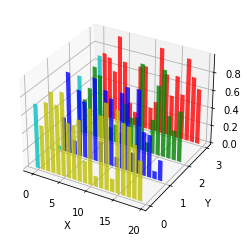

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()